In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.3.1


In [ ]:
!wget --no-check-certificate \ https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \-O /tmp/rockpaperscissors.zip

In [ ]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
val_dir = os.path.join(base_dir, 'rps-cv-images')

In [ ]:
#membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
#membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
#membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

#membuat direktori rock pada direktori data validation
train_rock_dir = os.path.join(val_dir, 'rock')
#membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(val_dir, 'paper')
#membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(val_dir, 'scissors')


In [ ]:
datagen = ImageDataGenerator(validation_split=0.3, rescale= 1./255)

In [ ]:
train_generator = datagen.flow_from_directory(
                train_dir,
                target_size = (150,150),
                batch_size = 4,
                subset = 'training',
                class_mode = 'categorical'
                )

validation_generator = datagen.flow_from_directory(
                val_dir,
                target_size = (150,150),
                batch_size = 4,
                subset = 'validation',
                class_mode = 'categorical'
                )

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [ ]:
#membuat model
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(512,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=50,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 1
)


Epoch 1/50
50/50 [==============================] - 11s 222ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/50
50/50 [==============================] - 11s 221ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3584 - val_accuracy: 0.9500
Epoch 3/50
50/50 [==============================] - 11s 222ms/step - loss: 0.0770 - accuracy: 0.9800 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4/50
50/50 [==============================] - 11s 222ms/step - loss: 0.0676 - accuracy: 0.9850 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 5/50
50/50 [==============================] - 11s 222ms/step - loss: 0.0378 - accuracy: 0.9900 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 6/50
50/50 [==============================] - 11s 221ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 7/50
50/50 [==============================] - 13s 250ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000

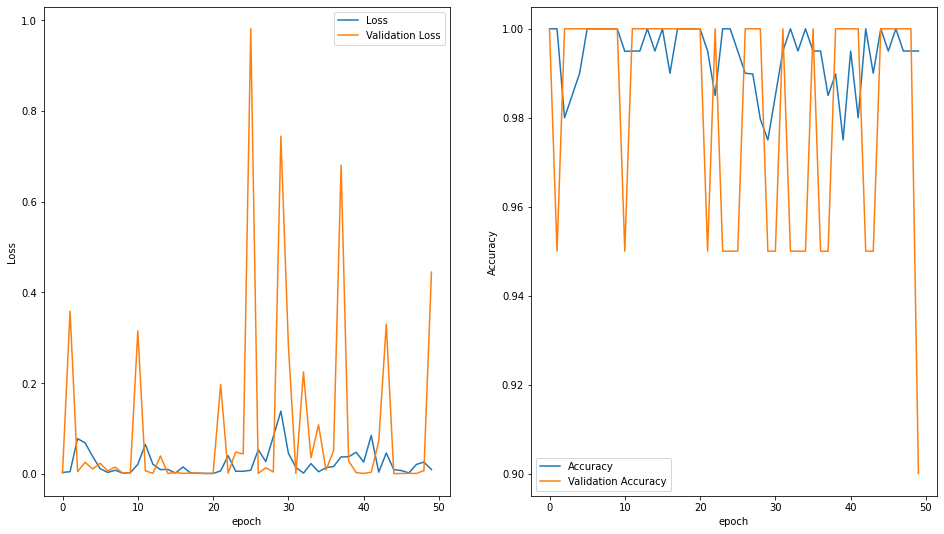

In [ ]:
#membuat plot 
import matplotlib.pyplot as plt

#Plot loss dan validation loss
plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.xlim(0,50)
plt.legend(loc='best')

#plot accuraccy dan validation accuracy
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

Saving 20200623_075808[1].jpg to 20200623_075808[1].jpg
20200623_075808[1].jpg
paper


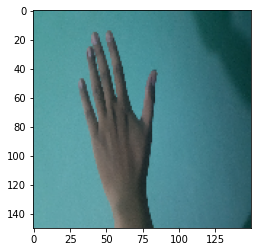

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]== 1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')

Saving rock.jpg to rock.jpg
rock.jpg
rock


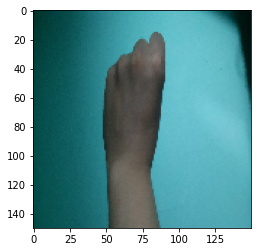

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]== 1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')

Saving scissors.jpg to scissors.jpg
scissors.jpg
scissors


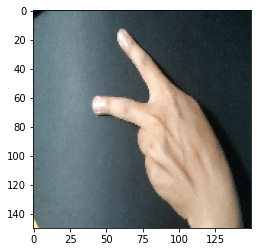

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]== 1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')